In [7]:
# 1. 년도, 월별로 인덱스를 설정하고 데이터를 보여 주시요
# 2. 2016년 사고대비 사망율을 보여 주시요
# 3. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시요
# 4. 2015년 대비  사망이 가장 많이 증가한 2016년도 월을 구하시요

In [2]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np
import urllib
import json
import folium
import warnings
import matplotlib.pyplot as plt
import matplotlib
warnings.simplefilter('ignore')

In [48]:
df2014 = pd.read_csv('2014년 졸음운전 교통사고.csv', engine='python')
df2014['연도']=2014
df2014['월']=df2014.index + 1
df2015 = pd.read_csv('2015년 졸음운전 교통사고.csv', engine='python')
df2015['연도']=2015
df2015['월']=df2015.index + 1
df2016 = pd.read_csv('2016년 졸음운전 교통사고.csv', engine='python')
df2016['연도']=2016
df2016['월']=df2016.index + 1
df = pd.concat( [df2014, df2015, df2016] )
df.drop(columns=['구분'], inplace=True)
df

사고(건)  사망(명)  부상(명)    연도   월
0     169      7    347  2014   1
1     145      3    268  2014   2
2     206     12    358  2014   3
3     182      4    360  2014   4
4     218     17    474  2014   5
5     233     13    457  2014   6
6     229     14    431  2014   7
7     222      9    447  2014   8
8     225     15    430  2014   9
9     210     14    392  2014  10
10    209     10    386  2014  11
11    178     12    329  2014  12
0     205      8    375  2015   1
1     175      8    375  2015   2
2     237      4    492  2015   3
3     227     10    486  2015   4
4     231      9    504  2015   5
5     207      8    401  2015   6
6     273      7    556  2015   7
7     268     19    534  2015   8
8     252     10    501  2015   9
9     214     14    475  2015  10
10    199      3    398  2015  11
11    213      8    428  2015  12
0     192      5    387  2016   1
1     174      6    328  2016   2
2     217      7    435  2016   3
3     216      7    419  2016   4
4     239     13    522  2016   5
5     200     12    362  2016   6
6     227      9    460  2016   7
7     230      7    490  2016   8
8     187     13    347  2016   9
9     183     10    367  2016  10
10    200      5    418  2016  11
11    168      4    364  2016  12

In [28]:
# 1. 년도, 월별로 인덱스를 설정하고 데이터를 보여 주시요
df = df.pivot_table(index=['연도', '월'])
df

부상(명)  사고(건)  사망(명)
연도   월                      
2014 1     347    169      7
     2     268    145      3
     3     358    206     12
     4     360    182      4
     5     474    218     17
     6     457    233     13
     7     431    229     14
     8     447    222      9
     9     430    225     15
     10    392    210     14
     11    386    209     10
     12    329    178     12
2015 1     375    205      8
     2     375    175      8
     3     492    237      4
     4     486    227     10
     5     504    231      9
     6     401    207      8
     7     556    273      7
     8     534    268     19
     9     501    252     10
     10    475    214     14
     11    398    199      3
     12    428    213      8
2016 1     387    192      5
     2     328    174      6
     3     435    217      7
     4     419    216      7
     5     522    239     13
     6     362    200     12
     7     460    227      9
     8     490    230      7
     9     347    187     13
     10    367    183     10
     11    418    200      5
     12    364    168      4

In [36]:
# 2. 2016년 사고대비 사망율을 보여 주시요
df2016['사망률(%)'] = (df2016['사망(명)']/df2016['사고(건)']*100)
df2016[ ['사망(명)', '사고(건)', '사망률(%)'] ]

사망(명)  사고(건)    사망률(%)
0       5    192  2.604167
1       6    174  3.448276
2       7    217  3.225806
3       7    216  3.240741
4      13    239  5.439331
5      12    200  6.000000
6       9    227  3.964758
7       7    230  3.043478
8      13    187  6.951872
9      10    183  5.464481
10      5    200  2.500000
11      4    168  2.380952

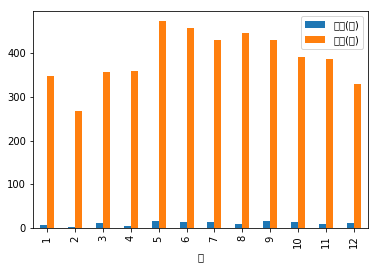

In [49]:
# 3. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시요
df2014.set_index('월', inplace=True)
df2014[["사망(명)", "부상(명)"]].plot(kind='bar')
plt.show()

In [61]:
# 4. 2015년 대비  사망이 가장 많이 증가한 2016년도 월을 구하시요
res = df2016['사망(명)'] - df2015['사망(명)']
df2 = pd.DataFrame(res)
df2['월']=df2.index + 1
df2.set_index('월', inplace=True)
df2[ df2['사망(명)']==df['살인 발생'].max() ]

사망(명)
월        
1      -3
2      -2
3       3
4      -3
5       4
6       4
7       2
8     -12
9       3
10     -4
11      2
12     -4